# Simple Spherical Harmonic Analyses

This tutorial demonstrates how to analyse global data on the sphere using spherical harmonic functions. In contrast to the two Introductory notebooks that make use of the pyshtools classes `SHCoeffs` and `SHGrid`, these examples will instead make use of the fortran wrapped functions.

In [1]:
%matplotlib inline
from __future__ import print_function # only necessary if using Python 2.x

import matplotlib.pyplot as plt
import numpy as np

from pyshtools.shio.shread import shread
from pyshtools.expand import MakeGridDH
from pyshtools.expand import SHExpandDH
from pyshtools.spectralanalysis import spectrum

In this example, we will use the topography of Earth that is provided in the example directory.

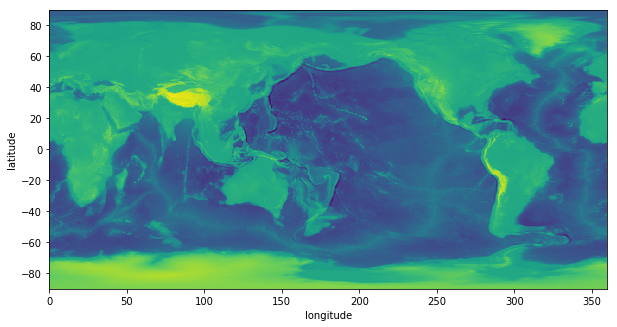

In [2]:
infile = '../ExampleDataFiles/srtmp300.msl'
clm, lmax = shread(infile)
topo = MakeGridDH(clm, sampling=2)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(topo, extent=(0, 360, -90, 90), cmap='viridis')
ax.set(xlabel='longitude', ylabel='latitude');

Using the grid `topo`, we will first demonstrate how to calculate the power spectrum, and second, how to perform simple filtering operations.

## The power spectrum

The power spectrum of a function describes how the variance of the function is distributed as a function of spherical harmonic degree. Concentration of power (or energy) in spherical harmonics with a particular wavelength can give hints about the origin of the feature. First, let's expand the gridded data into spherical harmonics:

In [3]:
coeffs = SHExpandDH(topo, sampling=2)
nl = coeffs.shape[1]
ls = np.arange(nl)

The "power spectrum" can be calculated using different conventions. The default in *pyshtools* is to calculate the total power of all angular orders as a function of spherical harmonic degee, which corresponds to the option `unit='per_l'`. The power per degree l is somewhat equivalent to the power at a given wavenumber magnitude |k| in 2D Fourier analyses.

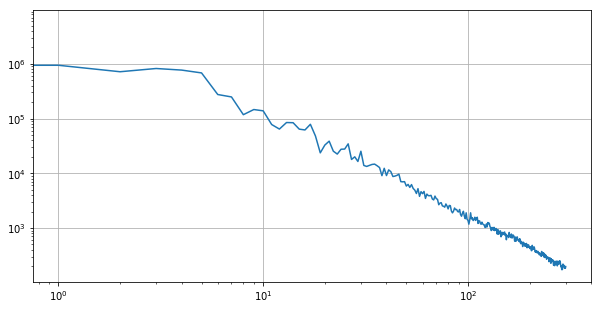

In [4]:
power_per_l = spectrum(coeffs)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(ls, power_per_l)
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid()

The average power per coefficient as a function of spherical harmonic degree can be calculated by setting the parameter `unit` equal to `'per_lm'`. This is simply the power per degree divided by (2l+1), and is analogous to the power per wavenumber kx and ky in 2D Fourier analyses.

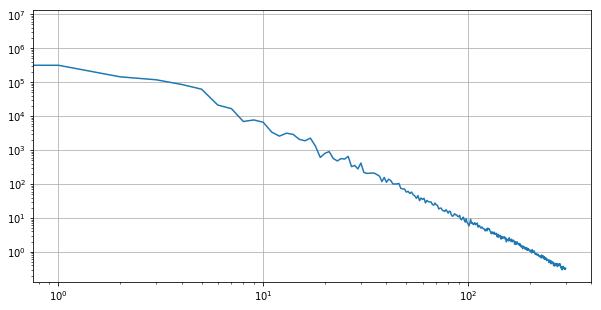

In [5]:
power_per_lm = spectrum(coeffs, unit='per_lm')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(ls, power_per_lm)
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid()

Finally, the contribution to the total power from all angular orders over an infinitessimal logarithmic degree band `dlog_a(l)` can be calculated by setting `unit='per_dlogl'`. In this case, the contrubution in the band
`dlog_a(l)` is `spectrum(l, 'per_dlogl')*dlog_a(l)`, where `a` is the base, and where `spectrum(l, 'per_dlogl)` is equal to `spectrum(l, 'per_l')*l*log(a)`. This power spectrum is useful to analyse dominant scales.

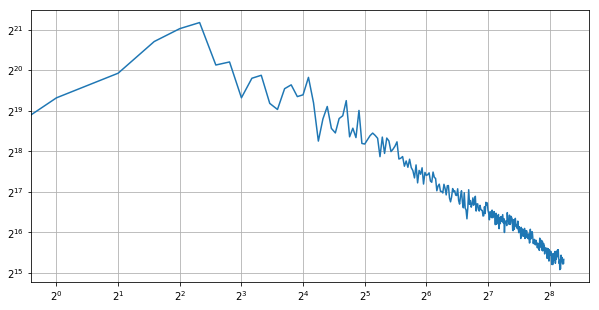

In [6]:
power_per_dlogl = spectrum(coeffs, unit='per_dlogl', base=2.)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(ls, power_per_dlogl)
ax.set_yscale('log', basey=2)
ax.set_xscale('log', basex=2)
ax.grid()

## Simple Filtering

A global dataset can be filtered isostropically by multiplying the spherical harmonic coefficients by a degree-dependent function. We demonstrate this by setting the coefficients greater or equal to degree 8 equal to zero.

In [7]:
coeffs_filtered = coeffs.copy()
lmax = 8
coeffs_filtered[:, lmax:, :] = 0.

topo_filtered = MakeGridDH(coeffs_filtered, sampling=2)

Next, we bandpass filter the data to retain only spherical harmonic coefficients between 8 <= l < 20.

In [8]:
coeffs_filtered2 = coeffs.copy()
lmin, lmax = 8, 20
coeffs_filtered2[:, :lmin, :] = 0.
coeffs_filtered2[:, lmax:, :] = 0.

topo_filtered2 = MakeGridDH(coeffs_filtered2, sampling=2)

Finally, let's plot the two filtered data sets:

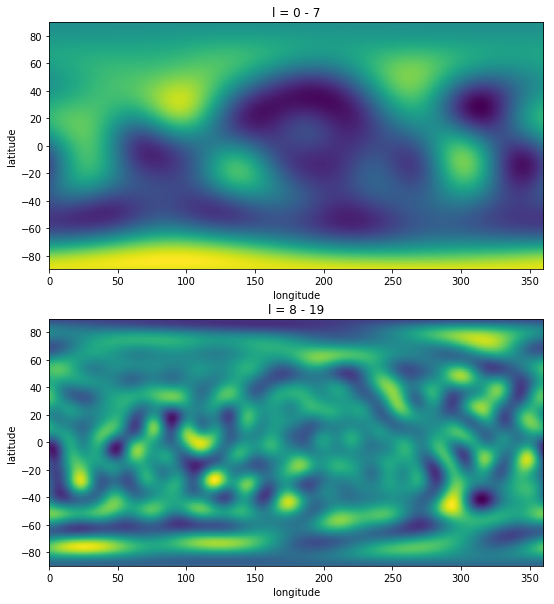

In [9]:
fig, (row1, row2) = plt.subplots(2, 1, figsize=(10, 10))
row1.imshow(topo_filtered, extent=(0, 360, -90, 90), cmap='viridis')
row1.set(xlabel='longitude', ylabel='latitude', title='l = 0 - 7');
row2.imshow(topo_filtered2, extent=(0, 360, -90, 90), cmap='viridis')
row2.set(xlabel='longitude', ylabel='latitude', title='l = 8 - 19');